# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [2]:
dataset=pd.read_csv('C:/Users/Indriani T Sitorus/Pictures/Dataset remove background_200/Datasetbaru2.csv')

In [3]:
dataset.head()

,Unnamed: 0,contrast,homogeneity,correlation,energy,class
0,700,0.266003,0.970601,0.965359,0.703653,1
1,701,0.308376,0.964254,0.961173,0.673365,1
2,702,0.467766,0.953260,0.950648,0.680419,1
3,703,0.465241,0.953607,0.950539,0.680838,1
4,704,0.275564,0.971259,0.970833,0.686363,1


In [4]:
# Drop unnecessary clumn ('Unnamed: 0')
dropping = ['Unnamed: 0']
dataset.drop(dropping, axis=1, inplace=True)
dataset.head()

,contrast,homogeneity,correlation,energy,class
0,0.266003,0.970601,0.965359,0.703653,1
1,0.308376,0.964254,0.961173,0.673365,1
2,0.467766,0.953260,0.950648,0.680419,1
3,0.465241,0.953607,0.950539,0.680838,1
4,0.275564,0.971259,0.970833,0.686363,1


In [5]:
X=dataset.drop(['class'], axis=1)

In [6]:
y=dataset['class']

# Splitting Dataset

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.10, random_state=0)

print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

The training set contains 1260 samples and the test set contains 140 samples


In [8]:
X_train.shape, y_train.shape

((1260, 4), (1260,))

In [9]:
X_test.shape, y_test.shape

((140, 4), (140,))

# Selecting Features

In [10]:
sel_=SelectKBest(mutual_info_classif, k=4).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['contrast', 'homogeneity', 'correlation', 'energy'], dtype='object')

In [11]:
X_train=X_train[['contrast', 'homogeneity', 'correlation', 'energy']]

In [12]:
X_test=X_test[['contrast', 'homogeneity', 'correlation', 'energy']]

# Normalizing training and testing sets

In [13]:
min_train=X_train.min()
range_train=(X_train-min_train).max()
X_train_scaled=(X_train-min_train)/range_train

In [14]:
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test

# 1. RBF Kernel

In [51]:
svc_model=SVC()
svc_model = SVC(kernel = 'rbf', random_state =0, gamma='scale', C=1.0)    
svc_model.fit(X_train_scaled, y_train)

print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(svc_model.score(X_train_scaled, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(svc_model.score(X_test_scaled, y_test)))

Accuracy of our SVM model on the training data is 0.96 out of 1
Accuracy of our SVM model on the test data is 0.93 out of 1


## Evaluate Training Accuracy RBF Model

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       625
           1       0.94      0.99      0.96       635

    accuracy                           0.96      1260
   macro avg       0.97      0.96      0.96      1260
weighted avg       0.97      0.96      0.96      1260



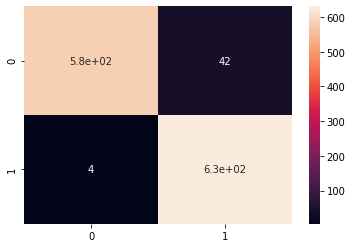

In [52]:
y_predict=svc_model.predict(X_train_scaled)
cm=confusion_matrix(y_train, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_train, y_predict))

# Predicting RBF Model

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        75
           1       0.87      1.00      0.93        65

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.93      0.93       140



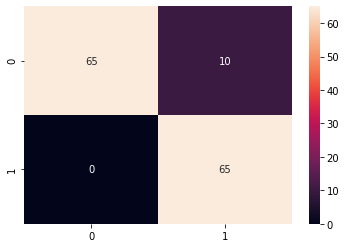

In [53]:
## Evaluate Testing Accuracy RBF Model
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [42]:
import pickle
filename = 'RBF Model 90_10.pkl'
pickle.dump(svc_model, open(filename, 'wb'))

# 2. Polynomial Kernel

In [43]:
svc_model = SVC(kernel = 'poly', random_state = 0, degree=2, C=1.0)    
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting Polynomial Model

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        75
           1       0.86      1.00      0.92        65

    accuracy                           0.92       140
   macro avg       0.93      0.93      0.92       140
weighted avg       0.93      0.92      0.92       140



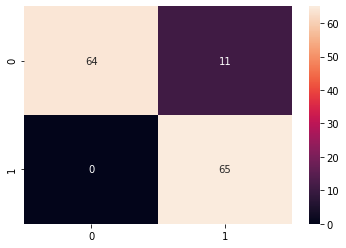

In [44]:
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [45]:
import pickle
filename = 'Polynomial Model 90_10.pkl'
pickle.dump(svc_model, open(filename, 'wb'))

# 3. Sigmoid Kernel

In [46]:
svc_model = SVC(kernel = 'sigmoid', random_state =0, gamma='scale', coef0=0.0)    
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting Sigmoid Model

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        75
           1       0.48      1.00      0.65        65

    accuracy                           0.49       140
   macro avg       0.74      0.53      0.37       140
weighted avg       0.76      0.49      0.35       140



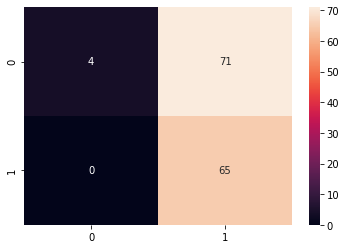

In [47]:
y_predict=svc_model.predict(X_test_scaled)
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

In [48]:
import pickle
filename = 'Sigmoid Model 90_10.pkl'
pickle.dump(svc_model, open(filename, 'wb'))